[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vmetsis/cads-cv/blob/main/2.1-morphological_transformations.ipynb)

# Morphological Transformations

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, the second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation.

Opening and Closing are derived from Erosion and Dilation, and they are used to remove noise.

## Download the Data

In [1]:
# If running on Google Colab, download the data first.

import os
import sys

def download_files(base_url, files, local_dir):
    if not os.path.exists(local_dir):
        os.makedirs(local_dir)
    for file in files:
        file_url = base_url + file
        os.system(f"wget -q {file_url} -P {local_dir}")

def download_data():
    base_url = "https://raw.githubusercontent.com/vmetsis/cads-cv/main/data/"
    data_files = ["sunset.jpg", "tennis_court2.jpg"]
    
    download_files(base_url, data_files, 'data')

if 'google.colab' in sys.modules:
    download_data()

## Erosion

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object. In a binary image foreground is white. Background is black. The erosion operation is performed by a structuring element called a kernel. The kernel is a matrix of odd size with all elements equal to 1. The kernel is applied to the image pixel by pixel. A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (set to zero).

Let use a kernel of size 5x5 and errode the sunset image from the previous example.

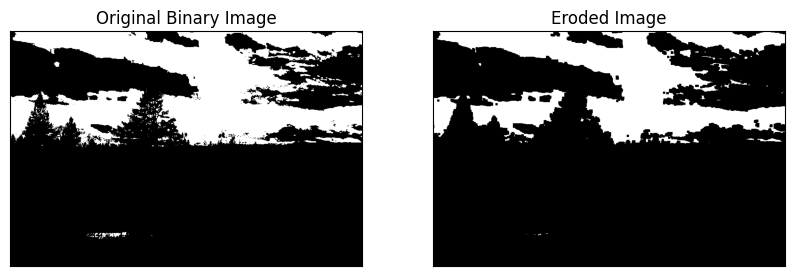

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

# Read image
img = cv.imread('data/sunset.jpg', 0)

# global thresholding
ret1, binary_img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Apply erosion
kernel = np.ones((5,5), np.uint8)
erosion = cv.erode(binary_img, kernel, iterations=1)

# Show original binary and eroded images
plt.figure(figsize=(10,5))
titles = ['Original Binary Image', 'Eroded Image']
images = [binary_img, erosion]
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

We notice that in the eroded image, the white pixels have been reduced.

## Dilation

Dilation is the opposite of erosion. Here, a pixel element is '1' if at least one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases.

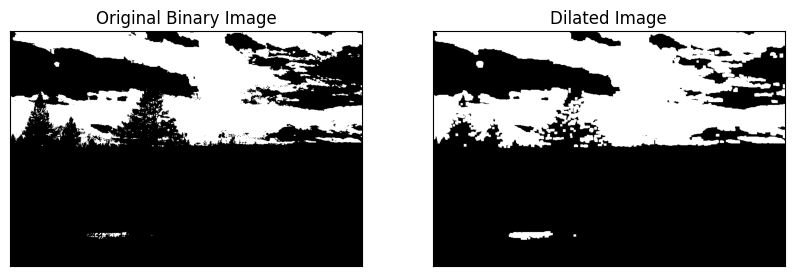

In [3]:
# Apply dilation to binary_img
dilation = cv.dilate(binary_img, kernel, iterations=1)

# Show original binary and dilated images
plt.figure(figsize=(10,5))
titles = ['Original Binary Image', 'Dilated Image']
images = [binary_img, dilation]
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


We notice that in the dialated image, the white pixels have been increased.

## Opening and Closing

Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object. An erosion followed by dilation is called **opening**.

**Closing** is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object. 

To apply the opening and closing operations we will use the function [`cv.morphologyEx`](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f).


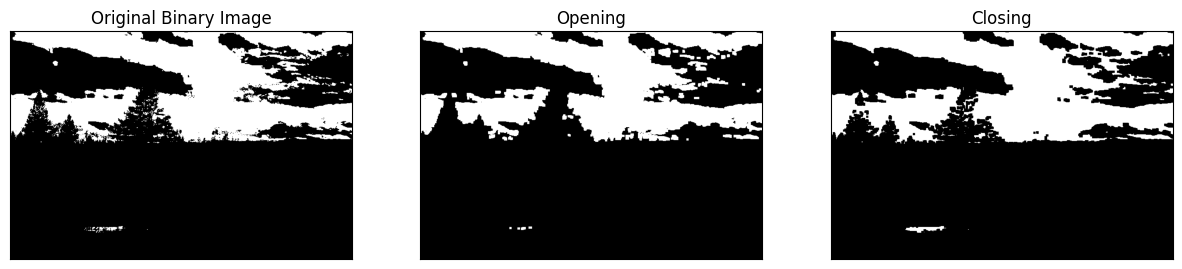

In [4]:
# Apply opening to binary_img
opening = cv.morphologyEx(binary_img, cv.MORPH_OPEN, kernel)

# Apply closing to binary_img
closing = cv.morphologyEx(binary_img, cv.MORPH_CLOSE, kernel)

# Show original binary, opening, and closing images
plt.figure(figsize=(15,5))
titles = ['Original Binary Image', 'Opening', 'Closing']
images = [binary_img, opening, closing]
for i in range(3):
    plt.subplot(1, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

## Information from Color

Color can provide useful information about object location and shape. Morphological operations can help refine that information. A simple example: finding boundaries of a tennis court.


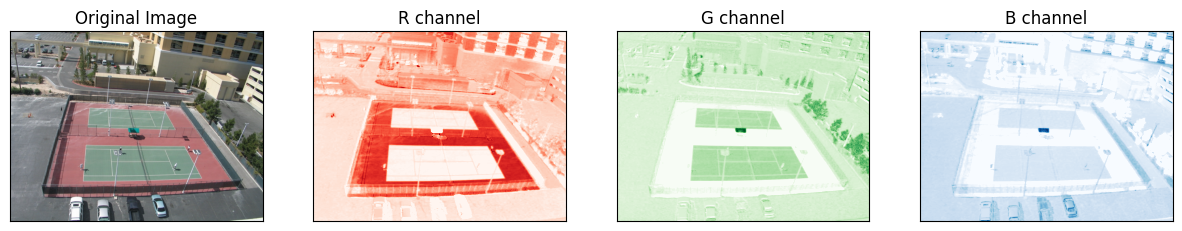

In [5]:
# Read the image
filename = 'data/tennis_court2.jpg'
color = cv.imread(filename)

# Convert BGR to RGB (OpenCV reads images in BGR format)
color = cv.cvtColor(color, cv.COLOR_BGR2RGB)

color = color.astype(np.float32)

# Extract R, G, B channels
r = color[:,:,0]
g = color[:,:,1]
b = color[:,:,2]

# Show the original image, and R, G, and B channels
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1), plt.imshow(color/255)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 2), plt.imshow(r/(r+g+b), 'Reds', vmin=0.3, vmax=0.5)
plt.title('R channel')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 3), plt.imshow(g/(r+g+b), 'Greens', vmin=0.3, vmax=0.5)
plt.title('G channel')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 4), plt.imshow(b/(r+g+b), 'Blues', vmin=0.3, vmax=0.5)
plt.title('B channel')
plt.xticks([]), plt.yticks([])
plt.show()

Find regions where red color is dominant

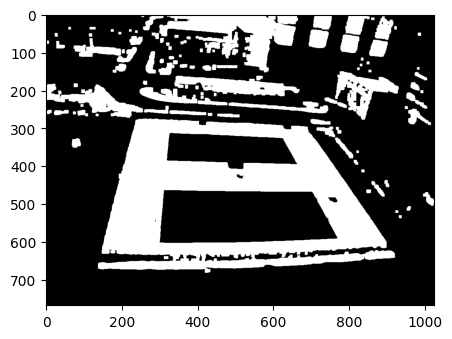

In [6]:
# Find regions where red color is dominant
red = (r - g > 10) & (r - b > 10)

# Convert boolean to binary (0 or 1)
red = red.astype(np.uint8)

# Dilate the 'red' regions
kernel = np.ones((7,7), np.uint8)
red = cv.dilate(red, kernel)

# Show dilated image
plt.figure(figsize=(5,5))
plt.imshow(red, cmap='gray')
plt.show()

Find regions where green color is dominant

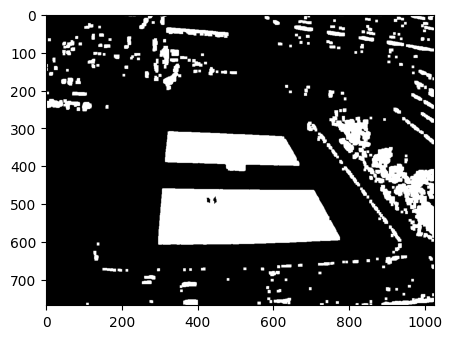

In [7]:
# Find regions where green color is dominant
green = (g - r > 10) & (g - b > 0)

# Convert the boolean array to uint8
green = green.astype(np.uint8)

# Dilate the 'green' regions
green = cv.dilate(green, kernel)

# Show dilated image
plt.figure(figsize=(5,5))
plt.imshow(green, cmap='gray')
plt.show()

Find boundary between red and green areas.
Note: red and green were dilated (see Python code on previous slide), so that their boundary is part of both the red and the green area.

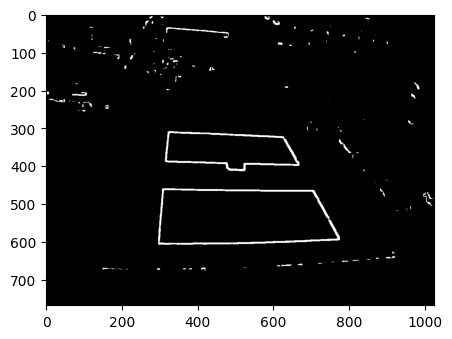

In [8]:
boundary = (red & green)

# Show boundary
plt.figure(figsize=(5,5))
plt.imshow(boundary, cmap='gray')
plt.show()

We note that the boundaries of the two courts are the two largest connected components. Extract the first and second largest connected component of the boundary image.

In [9]:
# Function to get the k-th largest component in a binary image
def get_component(binary, k):
    # Perform connected component analysis
    _, labels, stats, _ = cv.connectedComponentsWithStats(binary.astype(np.uint8), connectivity=8)
    
    # Number of components, subtracting 1 to ignore the background
    number = len(stats) - 1
    
    # If there are fewer than k components, return None
    if number < k:
        return None

    # Remove the entry for the background
    stats = stats[1:]
    
    # Sort components by their area in descending order and get the ids
    ids = np.argsort(-stats[:, cv.CC_STAT_AREA])

    # Get the k-th largest component
    return (labels == ids[k-1] + 1).astype(np.uint8)

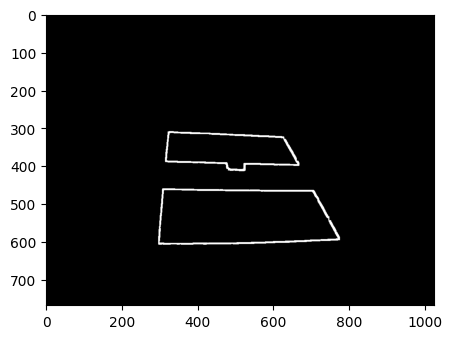

In [10]:
# Get the first and second largest components
b1 = get_component(boundary, 1)
b2 = get_component(boundary, 2)

final_result = b1 | b2

# Show boundaries
plt.figure(figsize=(5,5))
plt.imshow(final_result, cmap='gray')
plt.show()